# Classifical Goal: To predict the likelihood of customers subscribing to Bank Term Deposits

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 2. Read File

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(include=['int64'])

print(categorical.columns)
print(numerical.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


# 3. Missing values check

In [6]:
df.isna().apply(pd.value_counts)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


# 4. Exploratory Data Analysis

In [7]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## 4.1 Univariate Visualization on Numerical Features via Histogram & Boxplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC98A93DA0>,
      dtype=object)

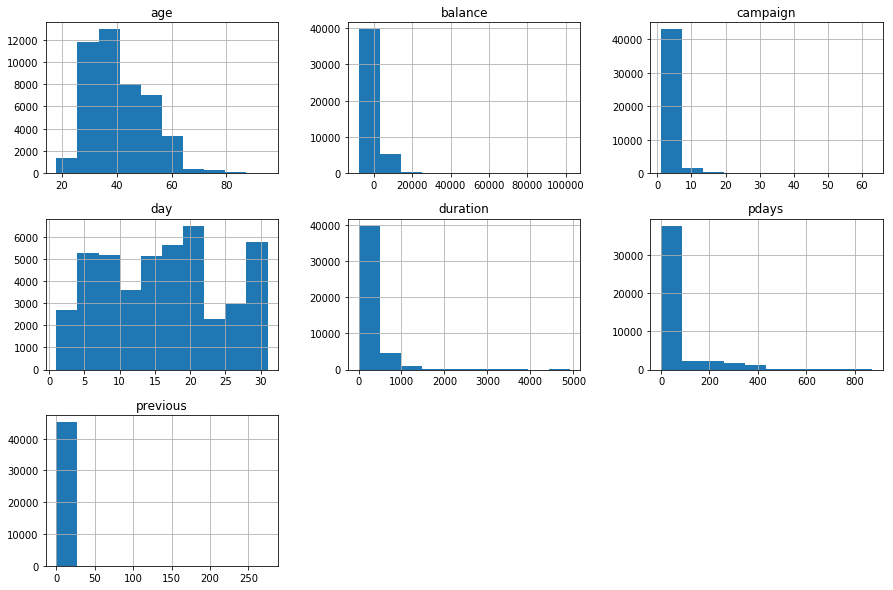

In [8]:
numerical.hist(figsize=(15,10))

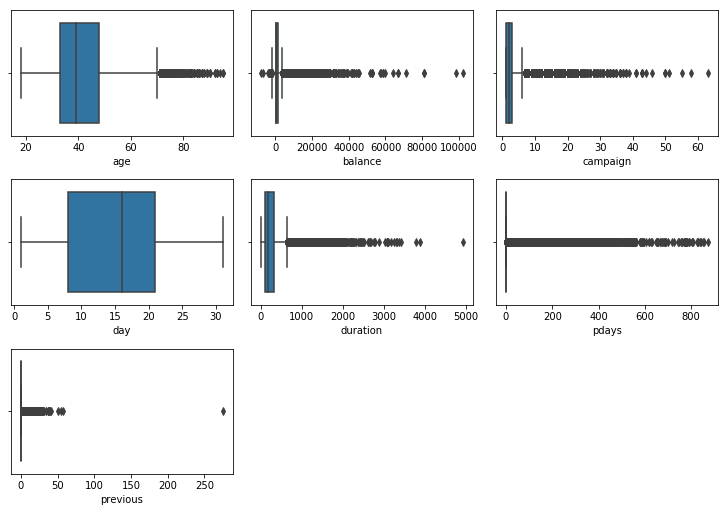

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,7), constrained_layout=True)
sns.boxplot(numerical['age'], ax=axes[0,0])
sns.boxplot(numerical['balance'], ax=axes[0,1])
sns.boxplot(numerical['campaign'], ax=axes[0,2])
sns.boxplot(numerical['day'], ax=axes[1,0])
sns.boxplot(numerical['duration'], ax=axes[1,1])
sns.boxplot(numerical['pdays'], ax=axes[1,2])
sns.boxplot(numerical['previous'], ax=axes[2,0])
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
plt.show()


### Observations:

In [10]:
categorical.describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
Target,45211,2,no,39922


## 4.2 Univariate Visualization on Categorical features

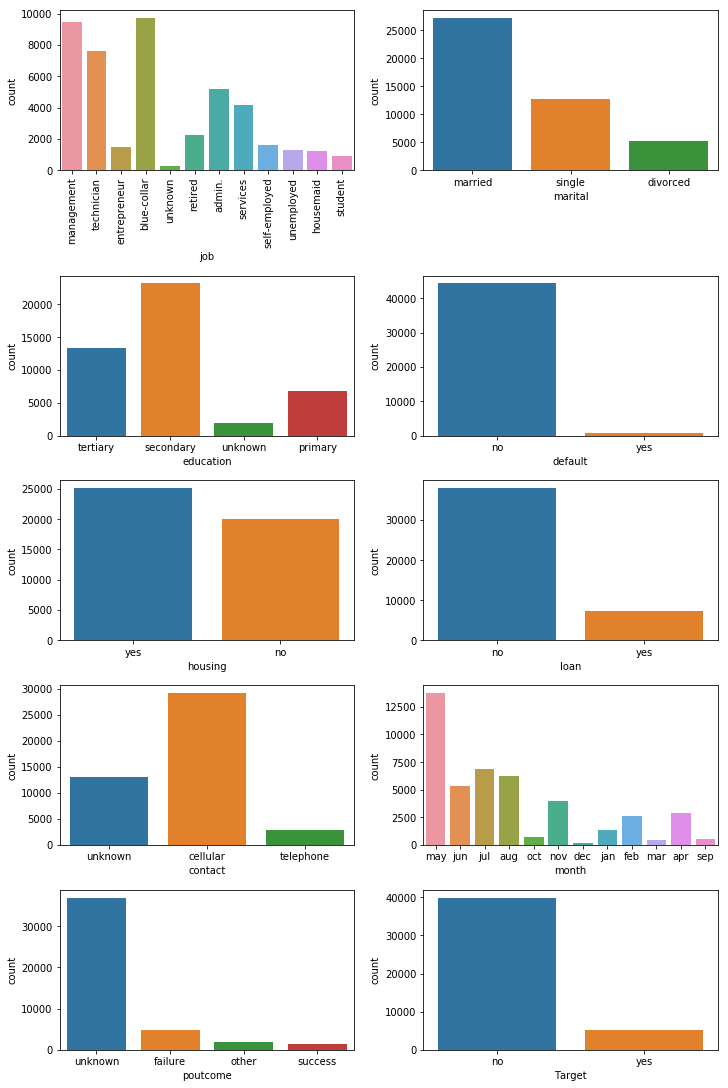

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(10,15), constrained_layout=True)

sns.countplot(x='job', data=categorical, ax=axes[0,0])
plt.setp(axes[0,0].get_xticklabels(), rotation=90)
sns.countplot(x='marital', data=categorical, ax=axes[0,1])
sns.countplot(x='education', data=categorical, ax=axes[1,0])
sns.countplot(x='default', data=categorical, ax=axes[1,1])
sns.countplot(x='housing', data=categorical, ax=axes[2,0])
sns.countplot(x='loan', data=categorical, ax=axes[2,1])
sns.countplot(x='contact', data=categorical, ax=axes[3,0])
sns.countplot(x='month', data=categorical, ax=axes[3,1])
sns.countplot(x='poutcome', data=categorical, ax=axes[4,0])
sns.countplot(x='Target', data=categorical, ax=axes[4,1])



### Observations:

## 4.3 Bivariate Plots

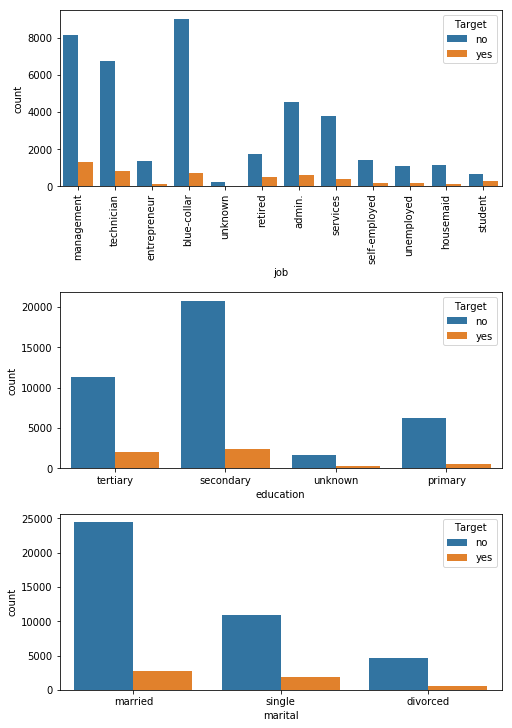

In [12]:
fig, axes = plt.subplots(3,1, figsize=(7,10), constrained_layout=True)

sns.countplot(data=df, x='job', hue='Target', ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=90)
sns.countplot(data=df, x = 'education', hue='Target', ax=axes[1])
sns.countplot(data=df, x='marital', hue='Target', ax=axes[2])


### Observations:

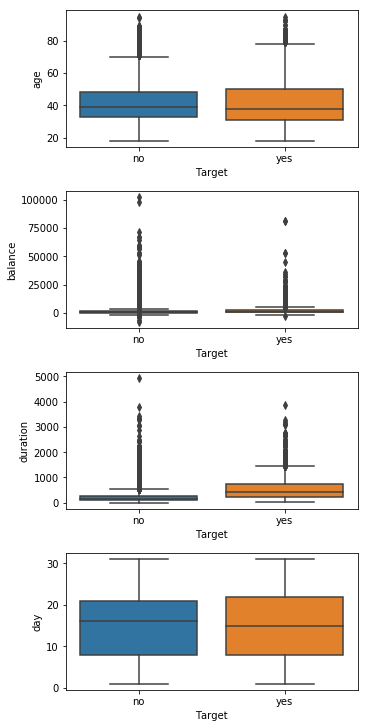

In [13]:
fig, axes = plt.subplots(4,1, figsize=(5,10), constrained_layout=True)

sns.boxplot(data=df, x='Target', y='age', ax=axes[0])
sns.boxplot(data=df, x='Target', y='balance', ax=axes[1])
sns.boxplot(data=df, x='Target', y='duration', ax=axes[2])
sns.boxplot(data=df, x='Target', y='day', ax = axes[3])


### Observations:

C:\Users\Ramya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ramya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ramya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ramya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


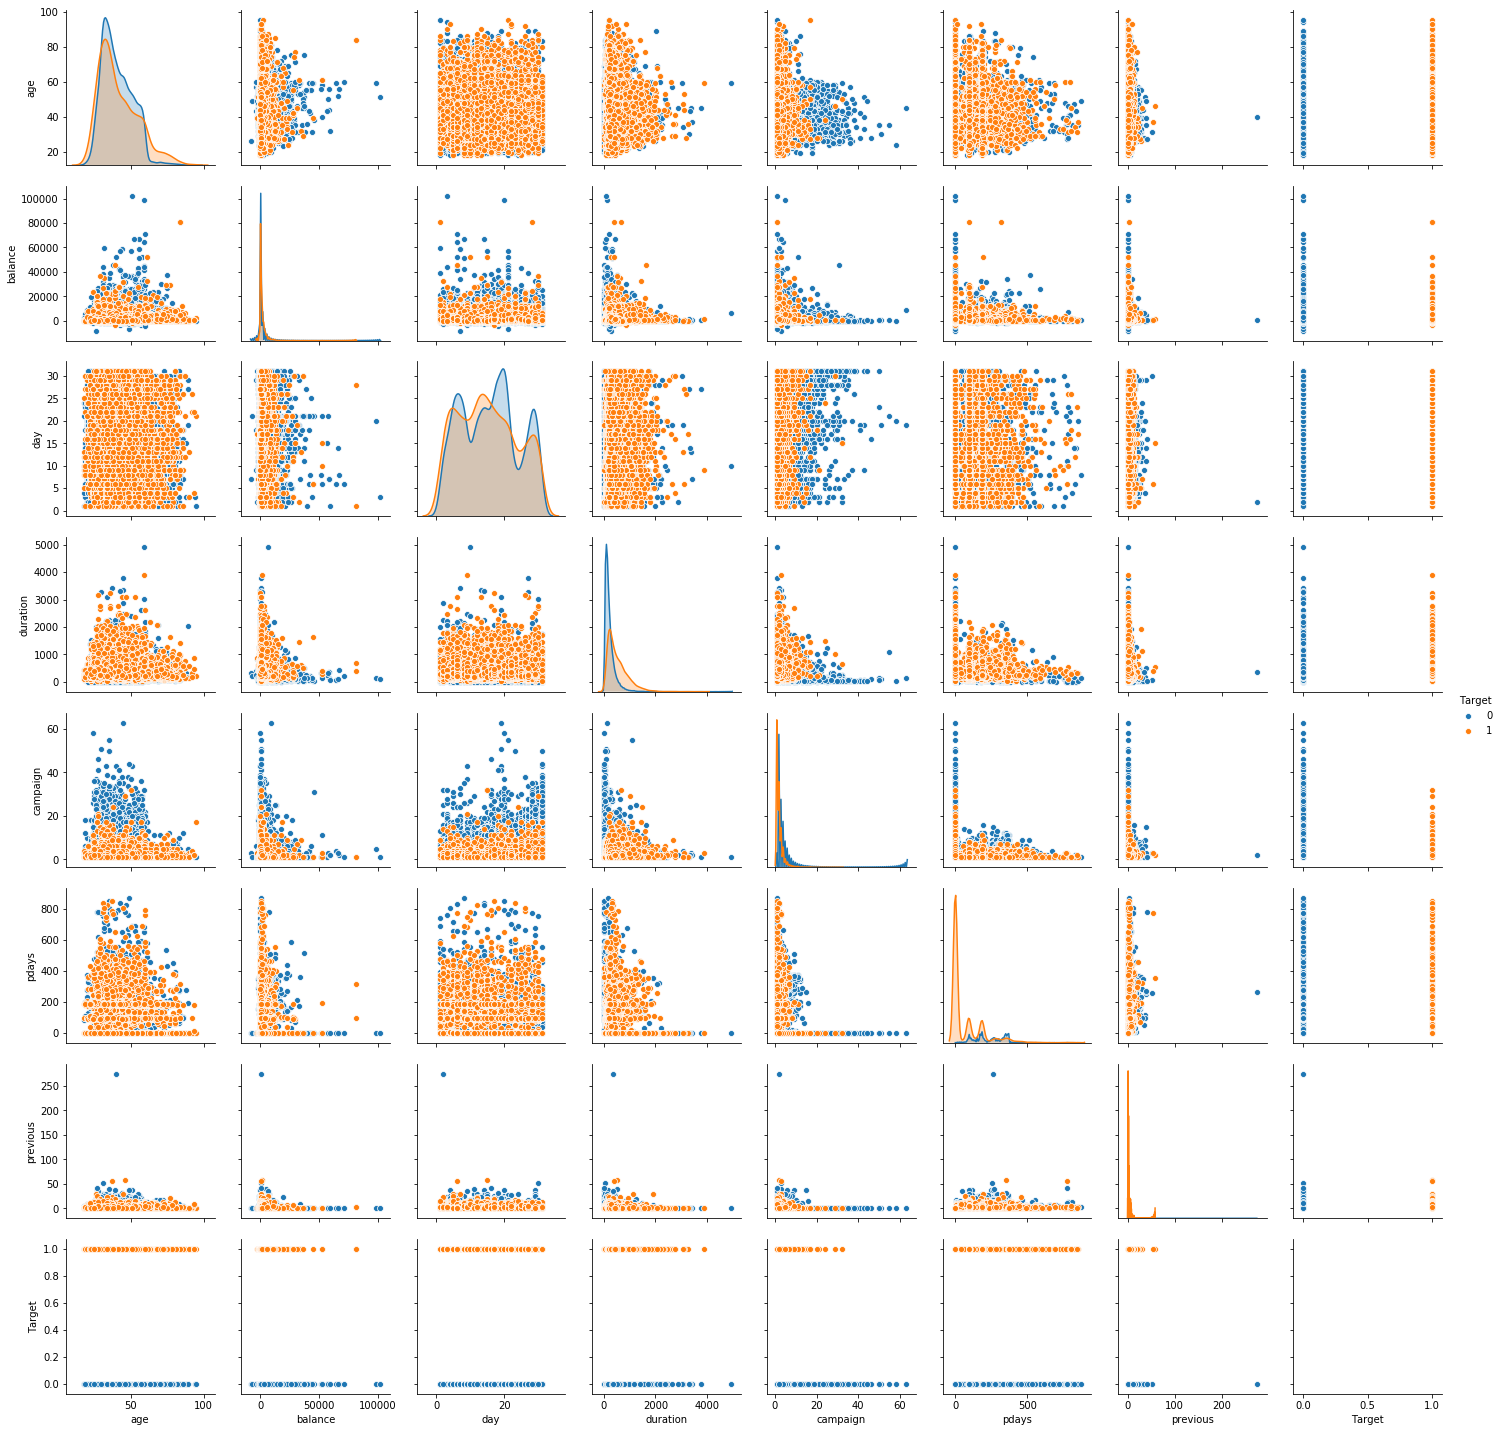

In [14]:
df['Target'] = df['Target'].replace({'yes':1, 'no':0})
sns.pairplot(df, hue='Target', diag_kind='kde')

## 4.4 Get dummies for categorical variables

In [15]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
      'month', 'poutcome'], drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
# Drop the following columns:
# 1) 'duration': this can only be known after the call is made
# 2) all columns with 'unknown' features i.e. job_unknown, education_unknown, contact_unknown, poutcome_unknown

df.drop(['duration', 'job_unknown', 'education_unknown', 'contact_unknown', 'poutcome_unknown'], axis=1, inplace=True)
df.head()

,age,balance,day,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,33,2,5,1,-1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,47,1506,5,1,-1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 4.5 Standardizing Data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:,0:6] = scaler.fit_transform(df.iloc[:,0:6])
df.head()


,age,balance,day,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
col_names=['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success','Target']
df = df.reindex(columns=col_names)
df.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Target
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 4.6. Correlation Matrix

In [19]:
corr=df.corr()
corr

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Target
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288,-0.044002,0.021792,0.086650,-0.023571,...,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.022967,0.035526,0.025155
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674,-0.048757,0.009642,0.001661,0.067797,...,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.008466,0.035240,0.052838
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710,-0.022898,-0.002312,0.003955,0.019021,...,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.032952,-0.030321,-0.028348
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855,0.008986,0.002128,0.003097,0.016686,...,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.020107,-0.057486,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820,0.020063,-0.014203,-0.031350,-0.007871,...,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.389791,0.228539,0.103621
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000,-0.017095,-0.008181,-0.015204,0.019579,...,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.306615,0.201424,0.093236
job_blue-collar,-0.044002,-0.048757,-0.022898,0.008986,0.020063,-0.017095,1.000000,-0.096585,-0.087951,-0.269376,...,-0.013203,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.001342,-0.053074,-0.072083
job_entrepreneur,0.021792,0.009642,-0.002312,0.002128,-0.014203,-0.008181,-0.096585,1.000000,-0.030969,-0.094850,...,0.025949,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,-0.013506,-0.019111,-0.019662
job_housemaid,0.086650,0.001661,0.003955,0.003097,-0.031350,-0.015204,-0.087951,-0.030969,1.000000,-0.086372,...,0.034992,0.052663,-0.000110,-0.066673,-0.013343,0.006155,-0.002265,-0.016769,-0.009375,-0.015195
job_management,-0.023571,0.067797,0.019021,0.016686,-0.007871,0.019579,-0.269376,-0.094850,-0.086372,1.000000,...,-0.013827,-0.032403,0.023532,-0.084114,0.051012,0.009704,0.023154,0.002223,0.021453,0.032919


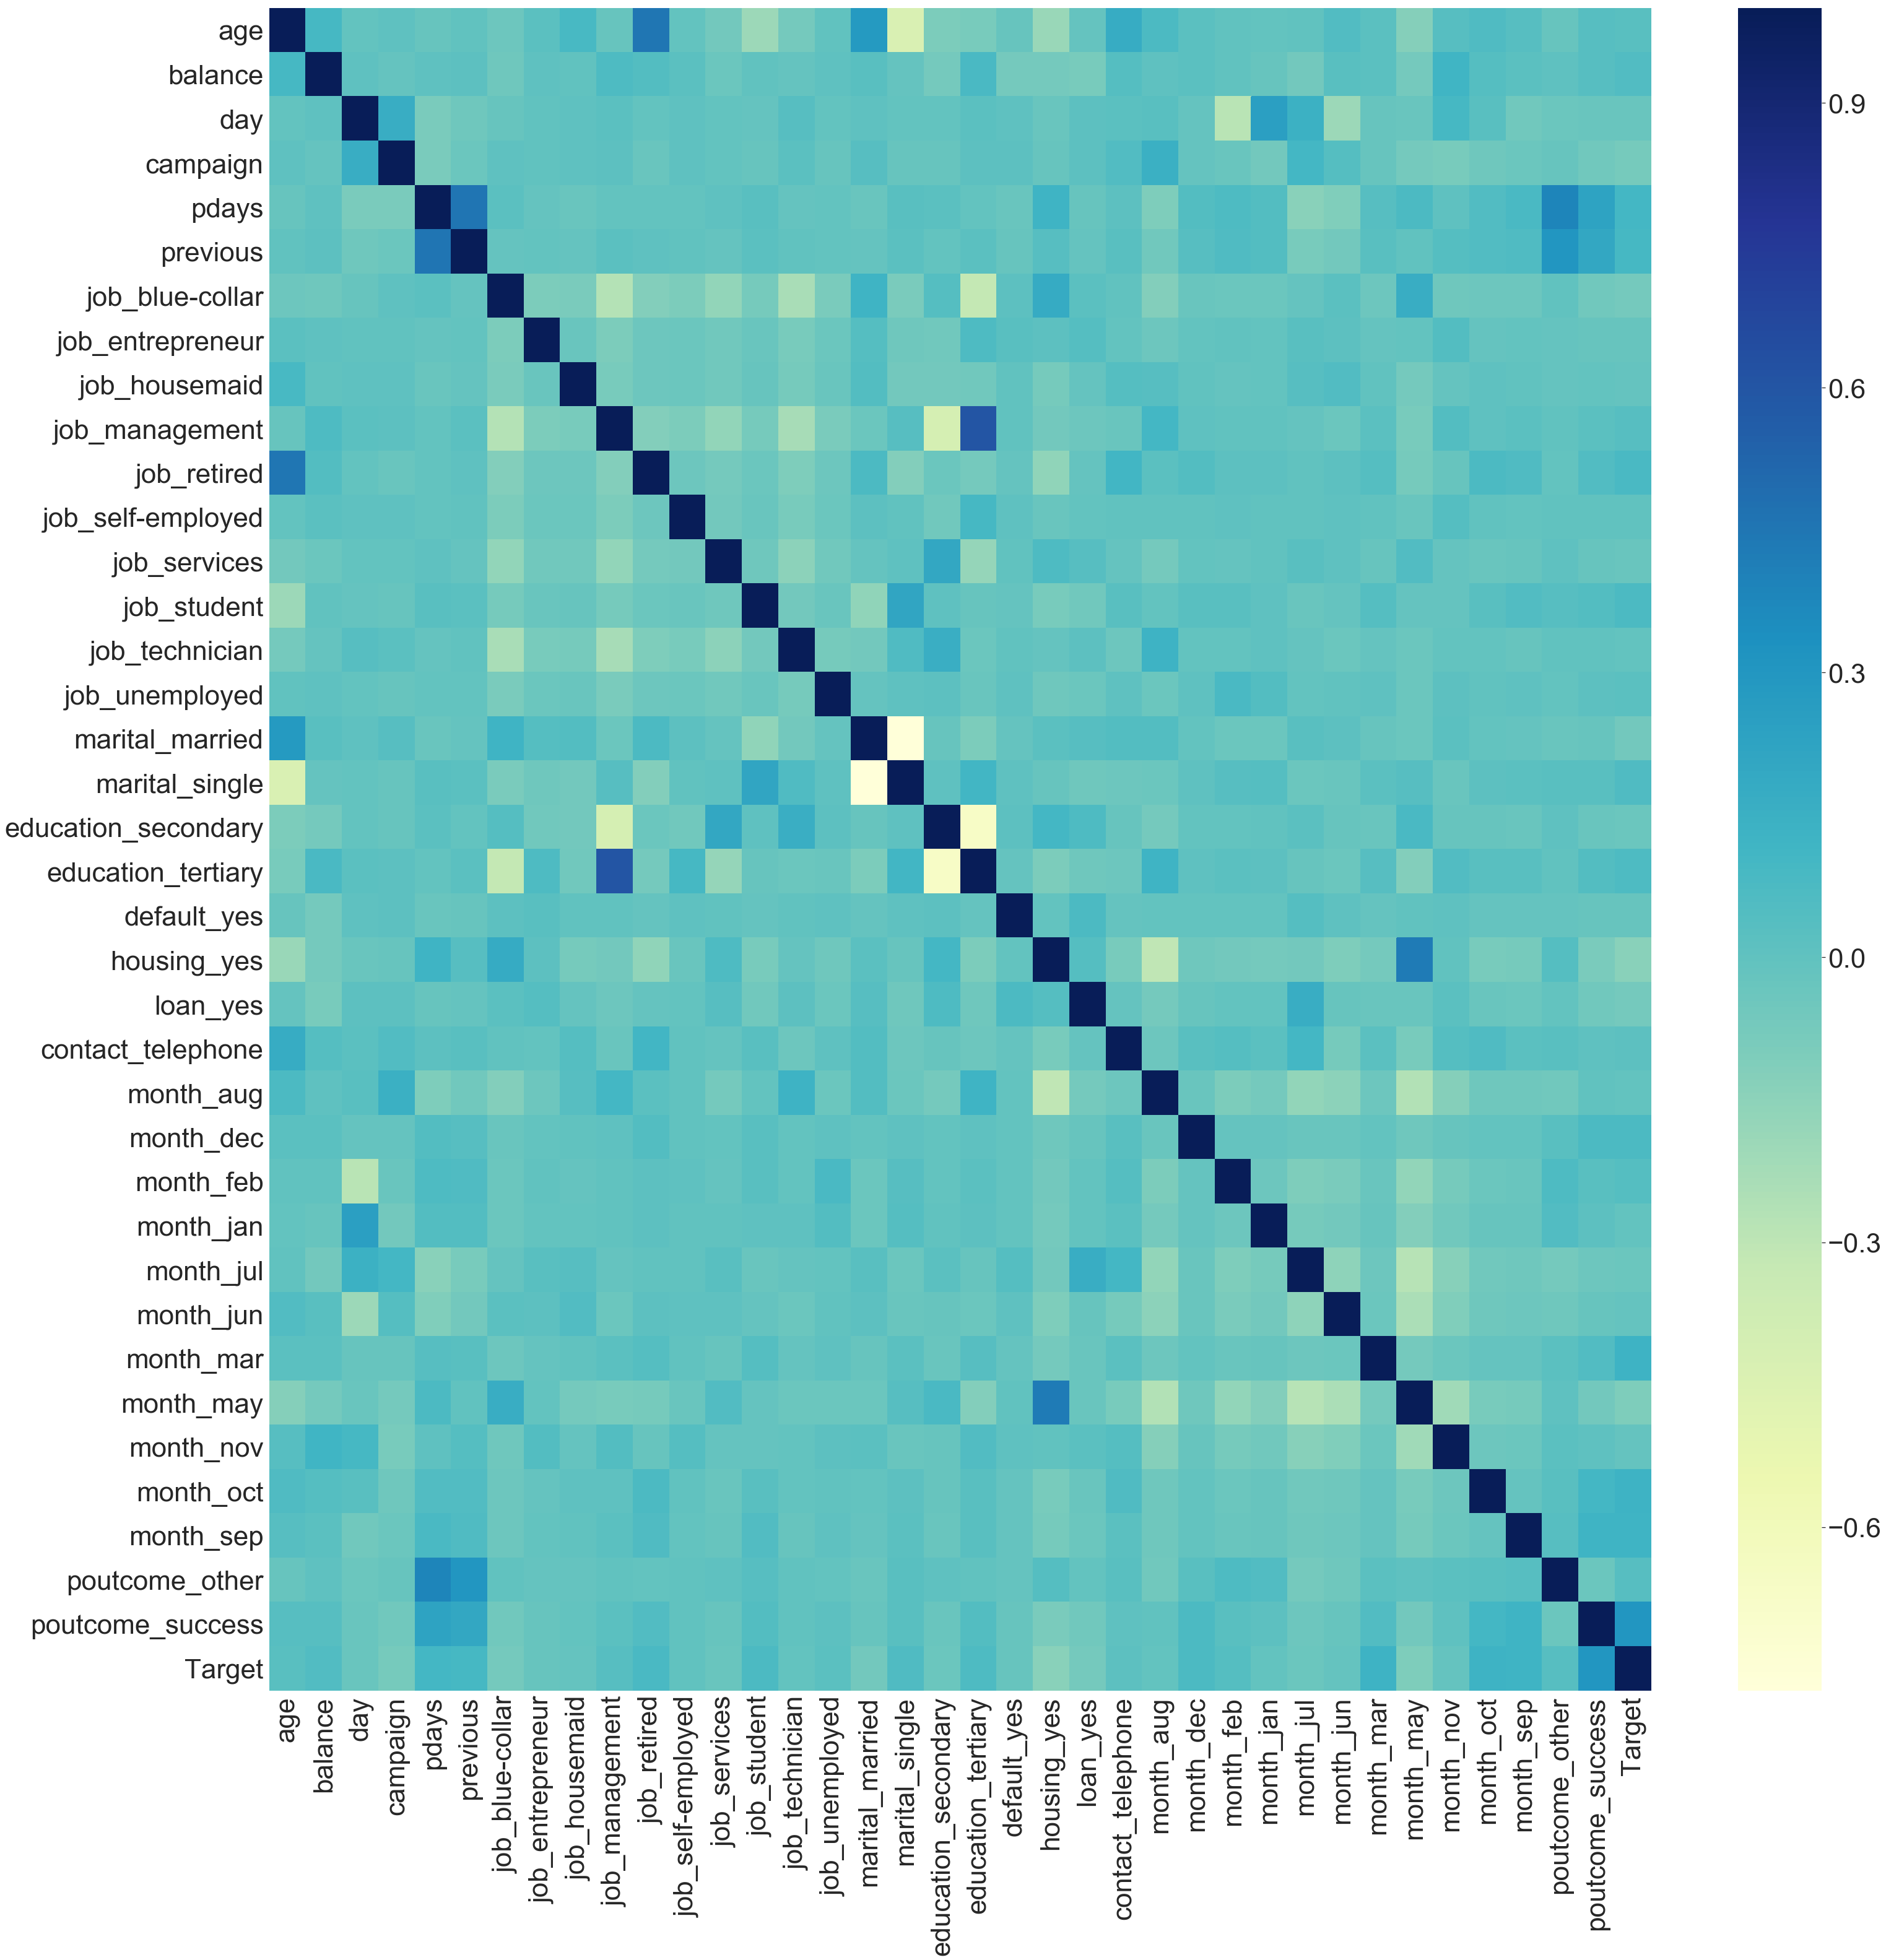

In [20]:
sns.set(font_scale=4.0)
plt.figure(figsize=(50,50))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu', annot=False)

### Observations:

In [21]:
df.drop(['job_self-employed', 'month_jan', 'month_aug'], axis=1, inplace=True)
df.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Target
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# 5. Build Models

## 5.1. Logistic Regression

In [22]:
X = df.drop('Target', axis=1)
y = df[['Target']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

logit = LogisticRegression(solver='liblinear')
logit.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_predict=logit.predict(X_test)

In [25]:
pd.DataFrame(logit.coef_, columns=X_train.columns, index=['Coefficients'])

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
Coefficients,-0.027736,0.070392,-0.031886,-0.290127,0.060092,0.047826,-0.138542,-0.319037,-0.309832,-0.061162,...,0.083945,-0.063836,-0.084631,1.554555,-0.409241,-0.224699,1.206655,1.127197,0.239458,2.239936


In [26]:
print('Accuracy(Train Data): {0:0.2f}%'.format(logit.score(X_train,y_train)*100))
print('Accuracy(Test Data): {0:0.2f}%'.format(logit.score(X_test,y_test)*100))

Accuracy(Train Data): 89.18%
Accuracy(Test Data): 89.46%


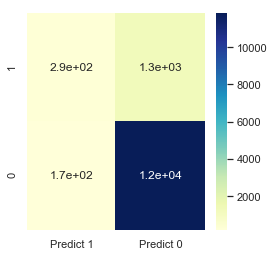

In [27]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')


In [28]:
print(metrics.classification_report(y_test, y_predict, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.63      0.19      0.29      1551
          0       0.90      0.99      0.94     12013

avg / total       0.87      0.89      0.87     13564



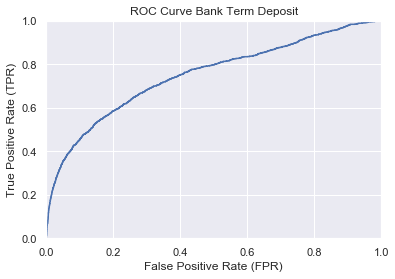

In [29]:
y_predict_proba = logit.predict_proba(X_test)[:,1]

fpr,tpr,threshold=metrics.roc_curve(y_test, y_predict_proba)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve Bank Term Deposit')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid=True


In [30]:
print('AUC score:{0:0.2f}%'.format(metrics.roc_auc_score(y_test, y_predict_proba)*100))

AUC score:74.98%


### Observations:

## 5.2 Naive Bayes

In [31]:
nbayes = GaussianNB()
nbayes.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [32]:
y_predict_nbayes = nbayes.predict(X_test)

In [33]:
print('Accuracy(Train Data):{0:0.2f}%'.format((nbayes.score(X_train,y_train))*100))
print('Accuracy(Test Data):{0:0.2f}%'.format((nbayes.score(X_test,y_test))*100))

Accuracy(Train Data):85.74%
Accuracy(Test Data):85.77%


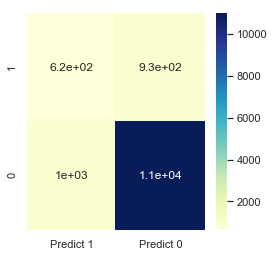

In [34]:
cm = metrics.confusion_matrix(y_test, y_predict_nbayes, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')



In [35]:
print(metrics.classification_report(y_test, y_predict_nbayes, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.38      0.40      0.39      1551
          0       0.92      0.92      0.92     12013

avg / total       0.86      0.86      0.86     13564



### Observations:

## 5.3 K-Nearest Neighbors (KNN)

In [36]:
KNN = KNeighborsClassifier(n_neighbors=15, weights='distance')
KNN.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

In [37]:
y_predict_KNN=KNN.predict(X_test)

In [38]:
print('Accuracy(Train Data):{0:0.2f}%'.format(KNN.score(X_train,y_train)*100))
print('Accuracy(Test Data):{0:0.2f}%'.format(KNN.score(X_test,y_test)*100))

Accuracy(Train Data):100.00%
Accuracy(Test Data):89.16%


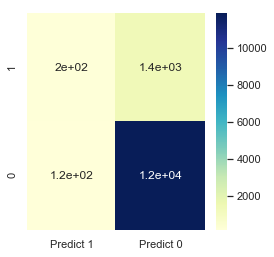

In [39]:
cm = metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')


In [40]:
print(metrics.classification_report(y_test, y_predict_KNN, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.63      0.13      0.21      1551
          0       0.90      0.99      0.94     12013

avg / total       0.87      0.89      0.86     13564



### Observations:

## 5.5 Decision Tree Classifier

In [41]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [42]:
y_predict_dtree=dtree.predict(X_test)

In [43]:
print('Accuracy(Train Data):{0:0.2f}%'.format(dtree.score(X_train,y_train)*100))
print('Accuracy(Test Data):{0:0.2f}%'.format(dtree.score(X_test,y_test)*100))

Accuracy(Train Data):100.00%
Accuracy(Test Data):82.25%


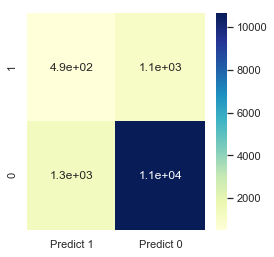

In [44]:
cm = metrics.confusion_matrix(y_test, y_predict_dtree, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')


In [45]:
Imp = pd.DataFrame(dtree.feature_importances_, columns = ["Feature Importance"], index = X_train.columns)
Imp.sort_values(by='Feature Importance', ascending = 'True')

,Feature Importance
default_yes,0.002796
job_student,0.003370
poutcome_other,0.003377
job_housemaid,0.003467
month_dec,0.004115
job_entrepreneur,0.005417
job_retired,0.006172
month_sep,0.006880
job_unemployed,0.007010
month_jun,0.008514


## 5.6 Ensemble Technique: Random Forest Classifier

In [46]:
rforest = RandomForestClassifier(criterion='entropy', random_state=1)
rforest.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [47]:
y_predict_rforest=rforest.predict(X_test)

In [48]:
print('Accuracy(Train Data):{0:0.2f}%'.format(rforest.score(X_train,y_train)*100))
print('Accuracy(Test Data):{0:0.2f}%'.format(rforest.score(X_test,y_test)*100))

Accuracy(Train Data):98.43%
Accuracy(Test Data):88.86%


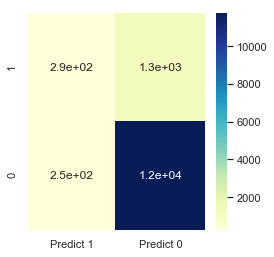

In [49]:
cm = metrics.confusion_matrix(y_test, y_predict_rforest, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

## 5.7 Apply Bagging

In [50]:
bagging = BaggingClassifier(n_estimators=50, random_state=1)
bagging.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

In [51]:
y_predict_bagging=bagging.predict(X_test)

In [52]:
print('Accuracy(Train Data):{0:0.2f}%'.format(bagging.score(X_train,y_train)*100))
print('Accuracy(Test Data):{0:0.2f}%'.format(bagging.score(X_test,y_test)*100))

Accuracy(Train Data):99.93%
Accuracy(Test Data):89.17%


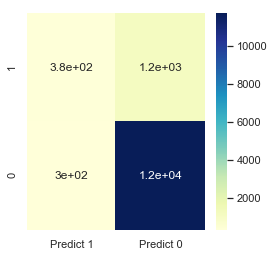

In [53]:
cm = metrics.confusion_matrix(y_test, y_predict_bagging, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

## 5.8 Apply AdaBoosting

In [54]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=1)
adaboost.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=1)

In [55]:
y_predict_adaboost=adaboost.predict(X_test)

In [56]:
print('Accuracy(Train Data):{0:0.2f}%'.format(adaboost.score(X_train,y_train)*100))
print('Accuracy(Test Data):{0:0.2f}%'.format(adaboost.score(X_test,y_test)*100))

Accuracy(Train Data):89.12%
Accuracy(Test Data):89.24%


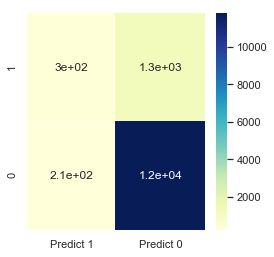

In [57]:
cm = metrics.confusion_matrix(y_test, y_predict_adaboost, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

## 5.9 Apply GradientBoosting

In [58]:
grad_boost = GradientBoostingClassifier(n_estimators=50, random_state=1, learning_rate=0.5)
grad_boost.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [59]:
y_predict_grad_boost=grad_boost.predict(X_test)

In [60]:
print('Accuracy(Train Data):{0:0.2f}%'.format(grad_boost.score(X_train,y_train)*100))
print('Accuracy(Test Data):{0:0.2f}%'.format(grad_boost.score(X_test,y_test)*100))

Accuracy(Train Data):90.26%
Accuracy(Test Data):89.21%


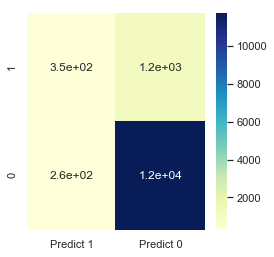

In [61]:
cm = metrics.confusion_matrix(y_test, y_predict_grad_boost, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index=['1','0'])

sns.set(font_scale=1.0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

### Observations:

# 6. Compare Model Accuracy

In [62]:
Values = [(89.18,89.46), (85.74, 85.77), (100.00,89.16), (100.00,89.16), (98.00,88.86),
          (99.93,89.17), (89.12,89.24), (90.26,89.21)]

compare = pd.DataFrame(Values, columns=['Train%', 'Test%'], index=['LogisticRegression','Naive Bayes','KNN','Decision Tree','Random Forest',
         'Bagging','AdaBoost','Gradient Boost'])
compare

,Train%,Test%
LogisticRegression,89.18,89.46
Naive Bayes,85.74,85.77
KNN,100.00,89.16
Decision Tree,100.00,89.16
Random Forest,98.00,88.86
Bagging,99.93,89.17
AdaBoost,89.12,89.24
Gradient Boost,90.26,89.21


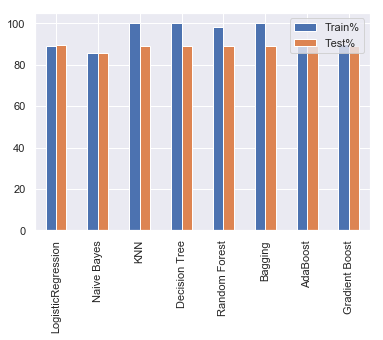

In [70]:
ax = compare.plot(kind='bar', legend=False)
plt.legend(loc='upper right')


# Conclusion